In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_dir = "/content/drive/MyDrive/dataset"

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 50

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    image_dir,
    shuffle = True,
    batch_size = BATCH_SIZE,
    image_size = (IMAGE_SIZE, IMAGE_SIZE)
)

Found 2162 files belonging to 3 classes.


In [ ]:
classes = dataset.class_names

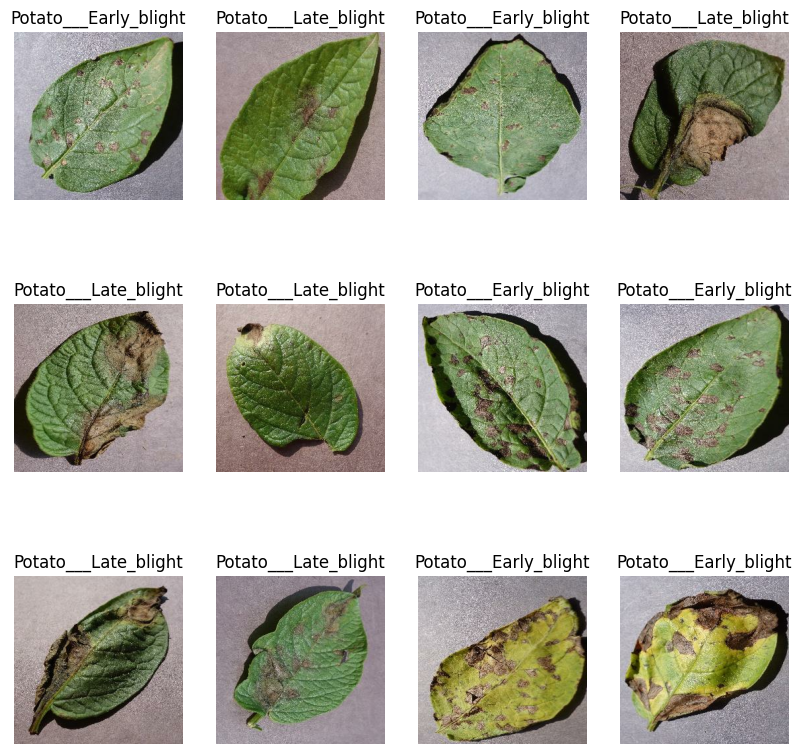

In [ ]:
plt.figure(figsize=(10,10))

for image_batch, lable_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(classes[lable_batch[i]])
    plt.axis("off")

In [ ]:
def train_test_val_split(ds, train_size = 0.8, test_size = 0.1, val_size = 0.1):
  dataset_size = tf.data.experimental.cardinality(ds).numpy()

  train_size = int(train_size * dataset_size)
  test_size = int(test_size * dataset_size)

  train_ds = ds.take(train_size)
  test_ds = ds.skip(train_size).take(test_size)
  val_ds = ds.skip(train_size + test_size)

  return train_ds, test_ds, val_ds

In [ ]:
train_data, test_data, val_data = train_test_val_split(dataset)

In [ ]:
len(train_data), len(test_data), len(val_data)

(54, 6, 8)

In [ ]:
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_data = test_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_data = val_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
resizing_and_rescaling = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(height_factor=0.2),
  layers.RandomTranslation(height_factor=0.2, width_factor=0.2),
  layers.RandomCrop(height=IMAGE_SIZE, width=IMAGE_SIZE),
])

In [ ]:
INPUT_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(classes)

model = tf.keras.Sequential([
    resizing_and_rescaling,
    data_augmentation,
    layers.Conv2D(64, (3, 3), activation="relu", input_shape = INPUT_SHAPE),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2),),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2),),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2),),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2),),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2),),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(n_classes, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ["accuracy"]
)

In [ ]:
model.fit(
  train_data,
  epochs = EPOCHS,
  batch_size = BATCH_SIZE,
  validation_data = val_data,
  verbose = 1
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 427s 2s/step - accuracy: 0.4556 - loss: 0.9580 - val_accuracy: 0.5785 - val_loss: 0.8416
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.5665 - loss: 0.8474 - val_accuracy: 0.6942 - val_loss: 0.6913
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.7082 - loss: 0.6825 - val_accuracy: 0.6570 - val_loss: 0.9382
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.7579 - loss: 0.6141 - val_accuracy: 0.6653 - val_loss: 1.0589
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.8095 - loss: 0.4852 - val_accuracy: 0.7645 - val_loss: 0.6771
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.8228 - loss: 0.4103 - val_accuracy: 0.8099 - val_loss: 0.6530
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.8338 - loss: 0.3858 - val_accuracy: 0.8430 - val_loss: 0.4186
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.8968 - loss: 0.3114 - val_accuracy: 0.8884 - v

In [ ]:
model.save("/content/drive/MyDrive/potato_diseases_classification_model.keras")

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/potato_diseases_classification_model.keras")

In [ ]:
scores = model.evaluate(test_data)

6/6 ━━━━━━━━━━━━━━━━━━━━ 181s 28ms/step - accuracy: 0.9863 - loss: 0.0274


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Actual image class : Potato___Late_blight
Predicted class : Potato___Late_blight


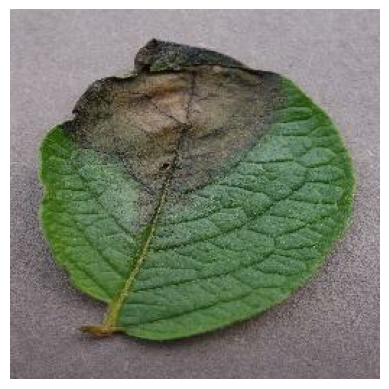

In [ ]:
for image_batch, lable_batch in test_data.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))
  plt.axis("off")

  batch_prediction = model.predict(image_batch)
  print("Actual image class : "+ classes[lable_batch[0].numpy()])
  print("Predicted class : " + classes[np.argmax(batch_prediction[0])])

In [ ]:
predictions = [98.002120121, 56.23232323232, 50.232323232]
round(np.max(predictions[0]), 2)

np.float64(98.0)

In [ ]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0) # creates a batch

  predictions = model.predict(img_array)

  predicted_class = classes[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])), 2)

  return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


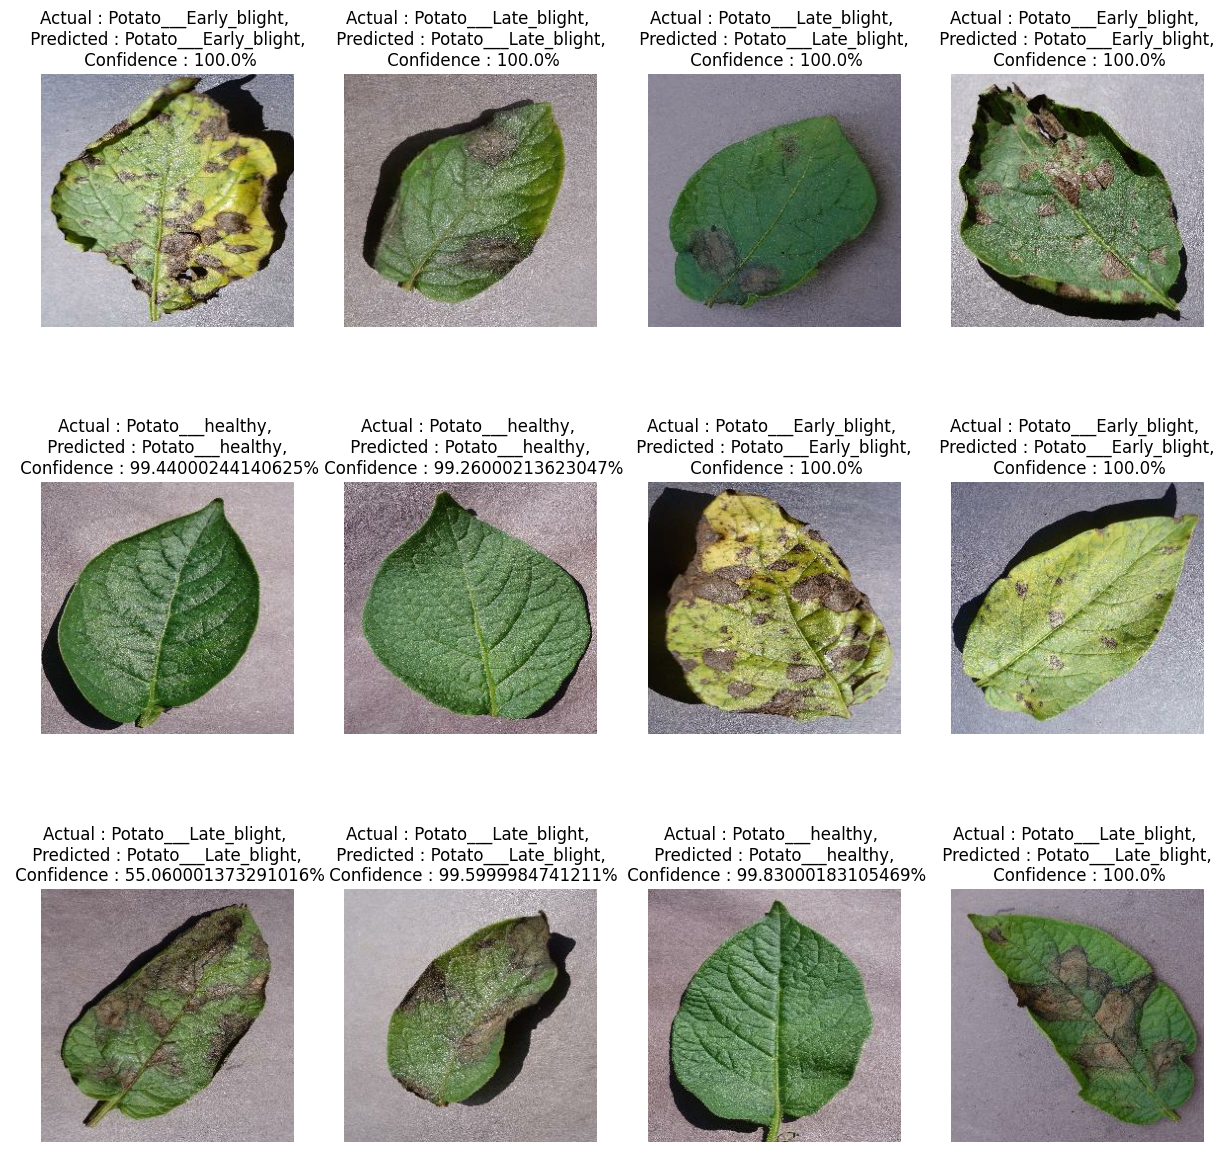

In [ ]:
plt.figure(figsize=(15,15))

for images, labels in test_data.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))

    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = classes[labels[i].numpy()]

    plt.title(f"Actual : {actual_class}, \n Predicted : {predicted_class}, \n Confidence : {confidence}%")

    plt.axis('off')